# LCU Select/Prepare Oracles

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SelectBlockEncoding`
LCU based block encoding using SELECT and PREPARE oracles.

Builds the block encoding via
$$
    B[H] = \mathrm{SELECT}
$$

$$
    \mathrm{SELECT} |l\rangle_a|\psi\rangle_s = |l\rangle_a U_l |\psi\rangle_s.
$$

The Hamiltonian can be extracted via

$$
    \langle G | B[H] | G \rangle = H / \alpha
$$

where

$$
    |G\rangle = \mathrm{PREPARE} |0\rangle_a = \sum_l \sqrt{\frac{w_l}{\alpha}} |l\rangle_a,
$$

The ancilla register is at least of size $\log L$.

In our implementations we typically split the ancilla registers into
selection registers (i.e.  the $l$ registers above) and junk registers which
are extra qubits needed by state preparation but not controlled upon during
SELECT.

#### Parameters
 - `select`: The bloq implementing the `SelectOracle` interface.
 - `prepare`: The bloq implementing the `PrepareOracle` interface. 

#### Registers
 - `selection`: The combined selection register.
 - `junk`: Additional junk registers not prepared upon.
 - `system`: The combined system register. 

#### References
 - [Hamiltonian Simulation by Qubitization](https://quantum-journal.org/papers/q-2019-07-12-163/).     Low et al. 2019. Sec 3.1, page 7 and 8 for high level overview and definitions. A     block encoding is called a standard form encoding there.
 - [The power of block-encoded matrix powers: improved regression techniques via faster Hamiltonian simulation](https://arxiv.org/abs/1804.01973).     Chakraborty et al. 2018. Definition 3 page 8.


In [2]:
from qualtran.bloqs.block_encoding import SelectBlockEncoding

### Example Instances

In [3]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import PrepareHubbard, SelectHubbard

# 3x3 hubbard model U/t = 4
dim = 3
select = SelectHubbard(x_dim=dim, y_dim=dim)
U = 4
t = 1
prepare = PrepareHubbard(x_dim=dim, y_dim=dim, t=t, u=U)
select_block = SelectBlockEncoding(select=select, prepare=prepare)

In [4]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import PrepareHubbard, SelectHubbard
from qualtran.bloqs.multiplexers.black_box_select import BlackBoxSelect
from qualtran.bloqs.state_preparation.black_box_prepare import BlackBoxPrepare

# 3x3 hubbard model U/t = 4
dim = 3
select = SelectHubbard(x_dim=dim, y_dim=dim)
U = 4
t = 1
prepare = PrepareHubbard(x_dim=dim, y_dim=dim, t=t, u=U)
black_box_select_block = SelectBlockEncoding(
    select=BlackBoxSelect(select), prepare=BlackBoxPrepare(prepare)
)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([select_block, black_box_select_block],
           ['`select_block`', '`black_box_select_block`'])

### Call Graph

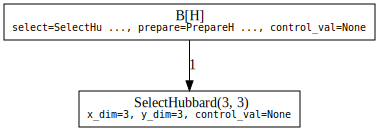

#### Counts totals:
 - `SelectHubbard(3, 3)`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
select_block_g, select_block_sigma = select_block.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(select_block_g)
show_counts_sigma(select_block_sigma)

## `LCUBlockEncoding`
LCU based block encoding using SELECT and PREPARE oracles.

Builds the standard block encoding from an LCU as
$$
    B[H] = \mathrm{PREPARE}^\dagger \cdot \mathrm{SELECT} \cdot \mathrm{PREPARE},
$$
where
$$
    \mathrm{PREPARE} |0\rangle_a = \sum_l \sqrt{\frac{w_l}{\alpha}} |l\rangle_a,
$$
and
$$
    \mathrm{SELECT} |l\rangle_a|\psi\rangle_s = |l\rangle_a U_l |\psi\rangle_s.
$$

The Hamiltonian can be extracted via
$$
    \langle 0 | B[H] | 0 \rangle = H / \alpha,
$$
This differs from the `SelectBlockEncoding` which uses Prepare for the signal state, while here
it is the identity operator.

The ancilla register is at least of size $\log L$.

In our implementations we typically split the ancilla registers into
selection registers (i.e.  the $l$ registers above) and junk registers which
are extra qubits needed by state preparation but not controlled upon during
SELECT.

#### Parameters
 - `select`: The bloq implementing the `SelectOracle` interface.
 - `prepare`: The bloq implementing the `PrepareOracle` interface. 

#### Registers
 - `selection`: The combined selection register.
 - `junk`: Additional junk registers not prepared upon.
 - `system`: The combined system register. 

#### References
 - [Hamiltonian Simulation by Qubitization](https://quantum-journal.org/papers/q-2019-07-12-163/).     Low et al. 2019. Sec 3.1, page 7 and 8 for high level overview and definitions. A     block encoding is called a standard form encoding there.
 - [The power of block-encoded matrix powers: improved regression techniques via faster Hamiltonian simulation](https://arxiv.org/abs/1804.01973).     Chakraborty et al. 2018. Definition 3 page 8.


In [7]:
from qualtran.bloqs.block_encoding import LCUBlockEncoding

### Example Instances

In [8]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import PrepareHubbard, SelectHubbard

# 3x3 hubbard model U/t = 4
dim = 3
select = SelectHubbard(x_dim=dim, y_dim=dim)
U = 4
t = 1
prepare = PrepareHubbard(x_dim=dim, y_dim=dim, t=t, u=U)
lcu_block = LCUBlockEncoding(select=select, prepare=prepare)

In [9]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import PrepareHubbard, SelectHubbard
from qualtran.bloqs.multiplexers.black_box_select import BlackBoxSelect
from qualtran.bloqs.state_preparation.black_box_prepare import BlackBoxPrepare

# 3x3 hubbard model U/t = 4
dim = 3
select = SelectHubbard(x_dim=dim, y_dim=dim)
U = 4
t = 1
prepare = PrepareHubbard(x_dim=dim, y_dim=dim, t=t, u=U)
black_box_lcu_block = LCUBlockEncoding(
    select=BlackBoxSelect(select), prepare=BlackBoxPrepare(prepare)
)

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([lcu_block, black_box_lcu_block],
           ['`lcu_block`', '`black_box_lcu_block`'])

### Call Graph

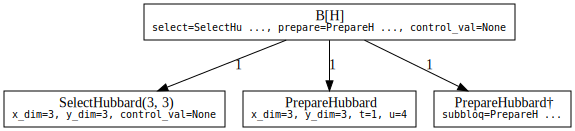

#### Counts totals:
 - `Adjoint(subbloq=PrepareHubbard)`: 1
 - `PrepareHubbard`: 1
 - `SelectHubbard(3, 3)`: 1

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
lcu_block_g, lcu_block_sigma = lcu_block.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lcu_block_g)
show_counts_sigma(lcu_block_sigma)

## `SelectOracle`
Abstract base class that defines the interface for a SELECT Oracle.

The action of a SELECT oracle on a selection register $|l\rangle$ and target register
$|\Psi\rangle$ can be defined as:

$$
    \mathrm{SELECT} = \sum_{l}|l \rangle \langle l| \otimes U_l
$$

In other words, the `SELECT` oracle applies $l$'th unitary $U_l$ on the target register
$|\Psi\rangle$ when the selection register stores integer $l$.

$$
    \mathrm{SELECT}|l\rangle |\Psi\rangle = |l\rangle U_{l}|\Psi\rangle
$$

In [12]:
from qualtran.bloqs.multiplexers.select_base import SelectOracle

## `PrepareOracle`
Abstract base class that defines the API for a PREPARE Oracle.

Given a set of coefficients $\{c_0, c_1, ..., c_{N - 1}\}$, the PREPARE oracle is used to encode
the coefficients as amplitudes of a state $|\Psi\rangle = \sum_{l=0}^{N-1} \sqrt{\frac{c_l}{\lambda}} |l\rangle$
where $\lambda = \sum_l |c_l|$, using a selection register $|l\rangle$. In order to prepare such
a state, the PREPARE circuit is also allowed to use a junk register that is entangled with
selection register.

Thus, the action of a PREPARE circuit on an input state $|0\rangle$ can be defined as:

$$
    \mathrm{PREPARE} |0\rangle = \sum_{l=0}^{N-1} \sqrt{ \frac{c_l}{\lambda} } |l\rangle |\mathrm{junk}_l\rangle
$$

In [13]:
from qualtran.bloqs.state_preparation.prepare_base import PrepareOracle

## `BlackBoxSelect`
A 'black box' Select bloq.

The `SELECT` operation applies the $l$'th unitary $U_{l}$ on the system register
when the selection register stores integer $l$.
When implementing specific `SelectOracle` bloqs, it is helpful to have multiple selection
registers each with semantic meaning. For example: you could have spatial or spin coordinates
on different, named registers. The `SelectOracle` interface encourages this. `BlackBoxSelect`
uses the properties on the `SelectOracle` interface to provide a "black box" view of a select
operation that just has a selection and system register.
During decomposition, this bloq will use the `Partition` utility bloq to partition
and route the parts of the unified selection register to the `Select` bloq.

#### Parameters
 - `select`: The bloq implementing the `SelectOracle` interface. 

#### Registers
 - `selection`: The combined selection register
 - `system`: The combined system register


In [14]:
from qualtran.bloqs.multiplexers.black_box_select import BlackBoxSelect

### Example Instances

In [15]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import SelectHubbard

select = SelectHubbard(2, 2)
black_box_select = BlackBoxSelect(select=select)

#### Graphical Signature

In [16]:
from qualtran.drawing import show_bloqs
show_bloqs([black_box_select],
           ['`black_box_select`'])

### Call Graph

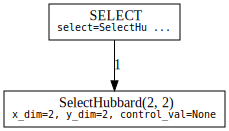

#### Counts totals:
 - `SelectHubbard(2, 2)`: 1

In [17]:
from qualtran.resource_counting.generalizers import ignore_split_join
black_box_select_g, black_box_select_sigma = black_box_select.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(black_box_select_g)
show_counts_sigma(black_box_select_sigma)

## `BlackBoxPrepare`
Provide a black-box interface to `Prepare` bloqs.

This wrapper uses `Partition` to combine descriptive selection
registers into one register named "selection".

#### Parameters
 - `prepare`: The bloq following the `Prepare` interface to wrap. 

#### Registers
 - `selection`: selection register.
 - `junk`: Additional junk registers not prepared upon.


In [18]:
from qualtran.bloqs.state_preparation.black_box_prepare import BlackBoxPrepare

### Example Instances

In [19]:
from qualtran.bloqs.chemistry.hubbard_model.qubitization import PrepareHubbard

prepare = PrepareHubbard(2, 2, 1, 4)
black_box_prepare = BlackBoxPrepare(prepare=prepare)

#### Graphical Signature

In [20]:
from qualtran.drawing import show_bloqs
show_bloqs([black_box_prepare],
           ['`black_box_prepare`'])

### Call Graph

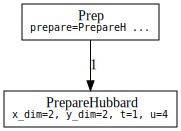

#### Counts totals:
 - `PrepareHubbard`: 1

In [21]:
from qualtran.resource_counting.generalizers import ignore_split_join
black_box_prepare_g, black_box_prepare_sigma = black_box_prepare.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(black_box_prepare_g)
show_counts_sigma(black_box_prepare_sigma)